In [3]:
#Importing libraries
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
#read csv file
df=pd.read_csv(r'C:\Users\pc\Documents\python internshala\Module 4 assignment\Transformed_Housing_Data2.csv')

In [5]:
df.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
df.shape

(21609, 31)

In [7]:
#Mean prediction
#Simplest predictive modelling
#taking average sale price for each house(inappropriate)

df['mean_sales']=df['Sale_Price'].mean()
df['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

# Simple Mean Regression

## Mean prediction and mean prediction based on some input.

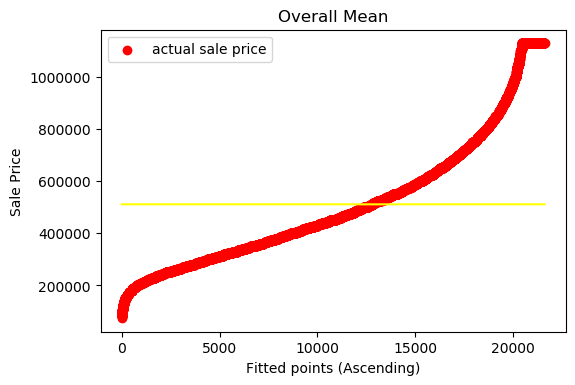

In [8]:
#Visualize the mean prediction.

# define image resolution.

plt.figure(dpi=100)   

# define a list 'k' which act as index on x-axis

k=range(0, len(df))

plt.scatter(k, df['Sale_Price'].sort_values(), color='red', label='actual sale price')

plt.plot(k, df['mean_sales'].sort_values(), color='yellow')

#Ascending format
plt.xlabel('Fitted points (Ascending)')
plt.ylabel('Sale Price')
plt.title('Overall Mean')
plt.legend()
plt.show()


In [9]:
#plotting mean sale price for overall_grades.

mean_grades=df.pivot_table(values='Sale_Price', columns='Overall Grade', aggfunc=np.mean)
mean_grades

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [10]:
#creating a new column
#for every grade fill its mean price in the new column
df['grade_mean']=0

for i in mean_grades.columns:
    df['grade_mean'][df['Overall Grade']==i]=mean_grades[i][0]
    df['grade_mean'].head(7)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#comparing mean sale price with mean sale price of overall grades

gradewise_list=[]
for i in range(1,11):
    k=df['Sale_Price'][df['Overall Grade']==i]
    gradewise_list.append(k)

In [12]:
classwise_list=[]
for i in range(1,11):
    k=df['Sale_Price'][df['Overall Grade']==i]
    classwise_list.append(k)

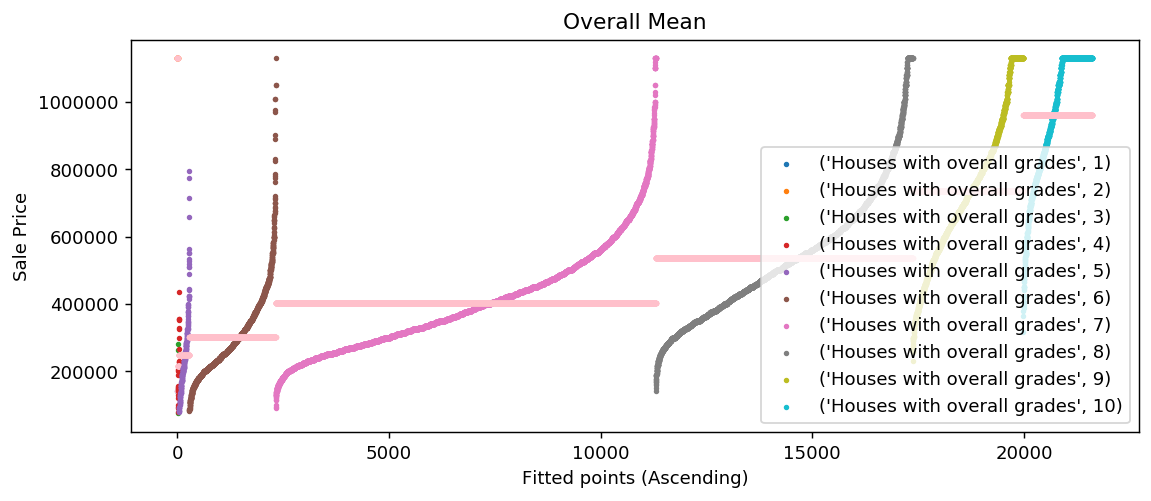

In [13]:
plt.figure(dpi=130, figsize=(10,4))

## plotting Sale price- gradewise ##

#use z variable to define list [x].

z=0
for i in range(1,11):
    
    #define X-axis using z
    
    points=[k for k in range(z, z+ len(classwise_list[i-1]))]
    
    plt.scatter(points, classwise_list[i-1].sort_values(), label=('Houses with overall grades', i), s=4)
    
     ## plotting gradewise-mean ##
    
    plt.scatter(points, [classwise_list[i-1].mean() for q in range (len(classwise_list[i-1]))], s=4, color='pink')
    z=max(points)+1
    plt.xlabel('Fitted points (Ascending)')
    plt.ylabel('Sale Price')
    plt.title('Overall Mean')
    plt.legend(loc=4) 
    
   # plt.scatter([q for q in range (0,z)], df['mean_sales'], color='red', label='Overall Mean', s=4)
   # plt.xlabel('Fitted points (Ascending)')
   # plt.ylabel('Sale Price')
   # plt.title('Overall Mean')
    #plt.legend(loc=4)    


   
   

# Residual plot

In [14]:
#calculating difference between prediction and actual data

mean_difference=df['mean_sales']-df['Sale_Price']
grade_mean_difference= df['grade_mean']-df['Sale_Price']

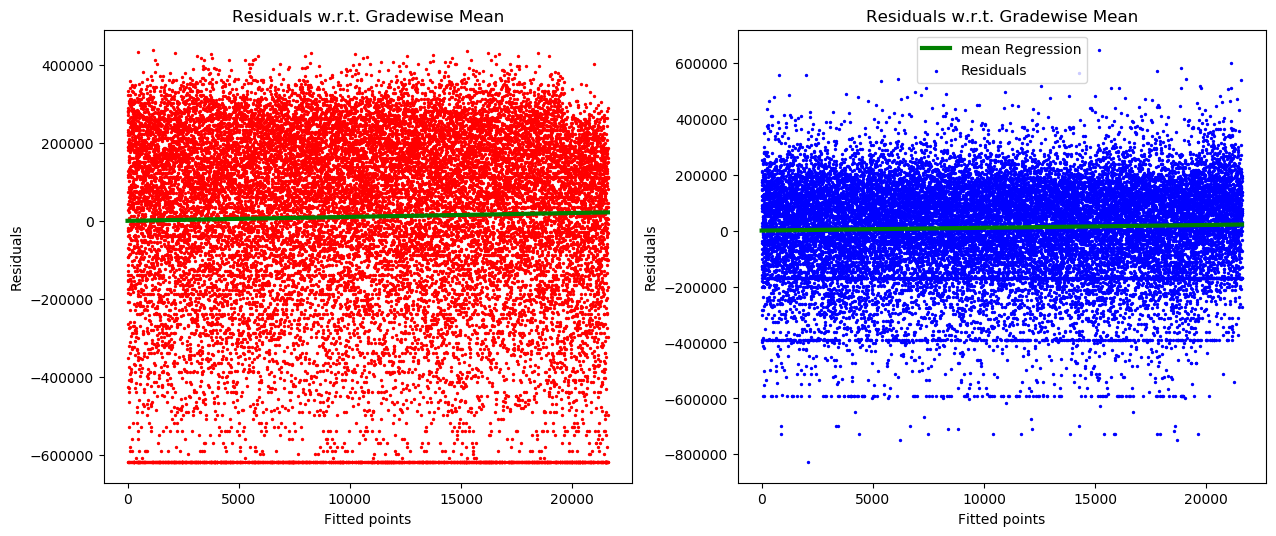

In [15]:
#create a list of indices for data points.
k=range (0,len(df))

#create a list of zeros when residual=0.
l=[0 for i in range(len(df))]

plt.figure(figsize=(15,6), dpi=100)

plt.subplot(1,2,1)
plt.scatter(k, mean_difference, color='red', label='Residuals', s=2)
plt.plot(k, color='green', label='mean Regression', linewidth=3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.title('Residuals w.r.t. Gradewise Mean')

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference, color='blue', label='Residuals', s=2)
plt.plot(k, color='green', label='mean Regression', linewidth=3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.title('Residuals w.r.t. Gradewise Mean')
plt.legend()



# Mean Error

In [16]:
#calculate mean error

cost=sum(mean_difference)/len(df)
print(round(cost,7))

0.0


# Mean Absolute Error

In [17]:
#define all input variables.

Y=df['Sale_Price']
Y_hat1=df['mean_sales']
Y_hat2=df['grade_mean']
n=len(df)
len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [18]:
#MAE for mean_Sales(model 1)

cost_mean=sum(abs(Y_hat1)-Y)/n
cost_mean

1.895260187332686e-09

In [19]:
#MAE for grade_mean(model 2)

cost_grade_mean=sum(abs(Y_hat2)-Y)/n
cost_grade_mean

-3.6984181791934267e-11

In [20]:
#calculing similar MAE using sklearn library

#MAE for model 1

from sklearn.metrics import mean_absolute_error
cost_mean=mean_absolute_error(Y_hat1,Y)
cost_mean

199168.7814684109

In [21]:
#MAE for model 2

cost_grade_mean=mean_absolute_error(Y_hat2,Y)
cost_grade_mean

137081.7029820291

# Mean Squared Error

In [22]:
#using sklearn 
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1,Y)
cost_grade_mean=mean_squared_error(Y_hat2,Y)
cost_mean, cost_grade_mean

(62528116847.799576, 30804835720.342426)

# Root Mean Square Error

In [23]:
# RMSE using sklearn
#RMSE higher trhan MSE

from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1,Y)**0.5
cost_grade_mean=mean_squared_error(Y_hat2,Y)**0.5
cost_mean, cost_grade_mean


(250056.2273725643, 175513.06424406826)

# R square

In [24]:
#define variables

Y=df['Sale_Price']
Y_hat=df['grade_mean']
Y_bar=df['mean_sales']
n=len(df)

len(Y), len(Y_hat), len(Y_bar), n

(21609, 21609, 21609, 21609)

In [25]:
#calcualte MSE for model 1-mean model

mse_mean=mean_squared_error(Y_bar, Y)
mse_mean

62528116847.799576

In [26]:
#calculate MSE for model 2-mean Regression model

mse_model=mean_squared_error(Y_hat, Y)
mse_model

30804835720.342426

In [27]:
#calculating R**2 for our mean model and mean regression model.

R2=1 - (mse_model/mse_mean)
R2

0.5073442592981836

# Linear Regression

In [28]:
#extracting top 30 rows of 2 columns-sale price & flat area and store them ikn  a new dataframe 'sample data' to find relationship between them.

sale_price=df['Sale_Price'].head(30)
flat_area=df['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})
sample_data



,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


No handles with labels found to put in legend.


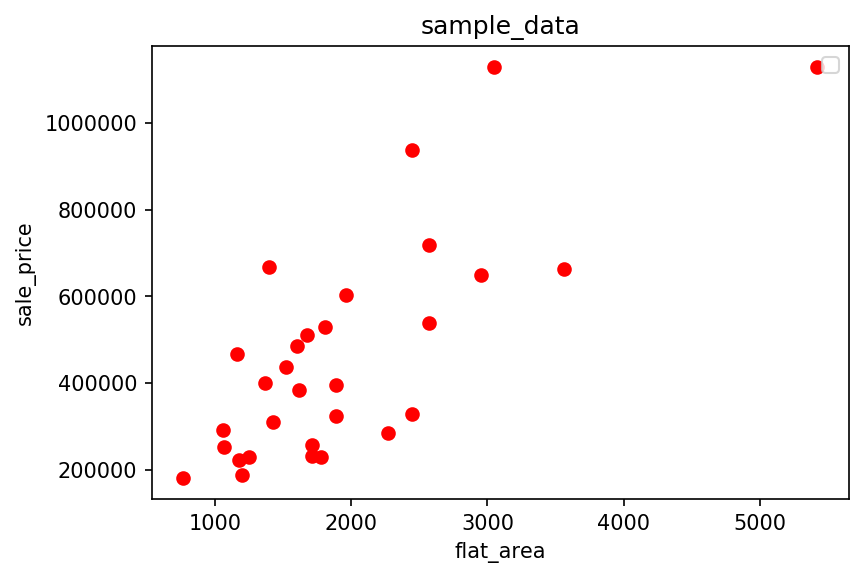

In [29]:
#use matplotlib for visualization of new dataframe.

plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red')
plt.xlabel('flat_area')
plt.ylabel('sale_price')
plt.title('sample_data')
plt.legend()

<function matplotlib.pyplot.show(*args, **kw)>

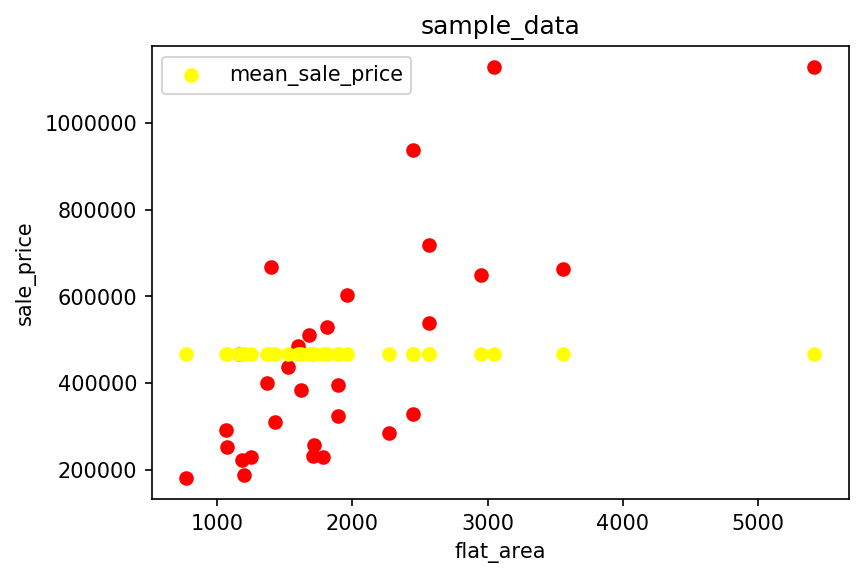

In [30]:
# add a new column mean_sale_price to dataframe sample_data.

sample_data['mean_sale_price']=sample_data['sale_price'].mean()

plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red')
plt.scatter(sample_data.flat_area, sample_data.mean_sale_price, color='yellow', label='mean_sale_price')

plt.xlabel('flat_area')
plt.ylabel('sale_price')
plt.title('sample_data')
plt.legend()
plt.show



# #Line Parameters

In [31]:
#m=slope of fit line, c=intercept on y axis  by fit line.
#assume m&c=0 and check whether this line fit or not.
#store y(line equation) values in list 'line'.

c=0
m=0

line=[]
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m+c)
    
    

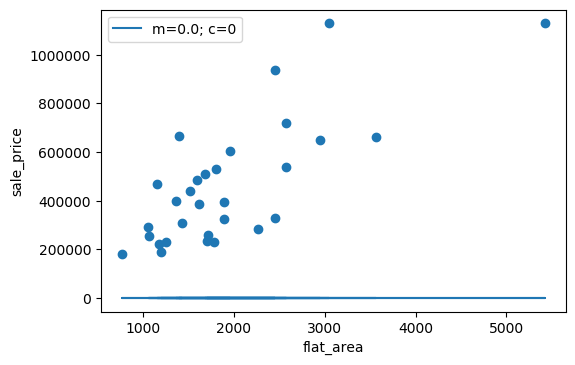

In [32]:
    plt.figure(dpi=100)
    plt.scatter(x=sample_data.flat_area, y=sample_data.sale_price)
    plt.plot(sample_data.flat_area, line, label='m=0.0; c=0')
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.legend()


poor fit line with m&c=0

In [33]:
#Changing m values

c=0
m=50

line=[]
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m+c)
    

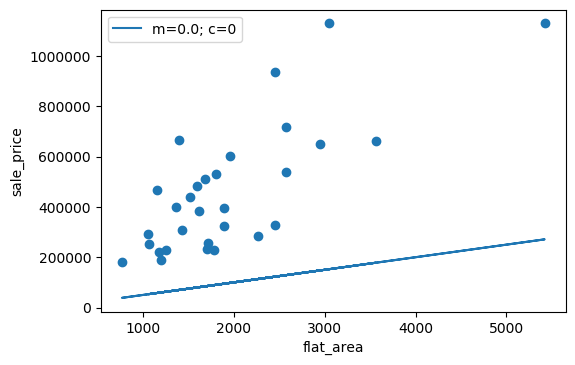

In [34]:
    plt.figure(dpi=100)
    plt.scatter(x=sample_data.flat_area, y=sample_data.sale_price)
    plt.plot(sample_data.flat_area, line, label='m=0.0; c=0')
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.legend()


In [35]:
#increase m va;ues to make a better fit line.

## best fit line we observed by visualization.

c=0
m=250

line=[]
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m+c)
    

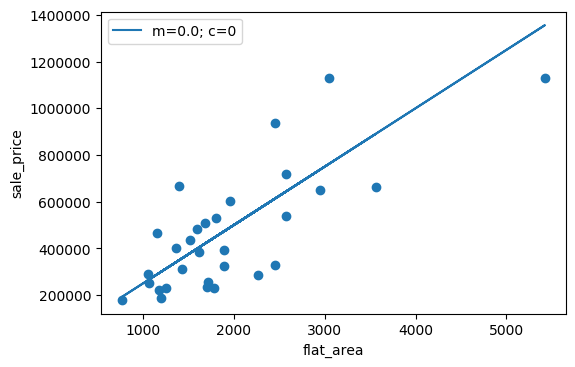

In [36]:
    plt.figure(dpi=100)
    plt.scatter(x=sample_data.flat_area, y=sample_data.sale_price)
    plt.plot(sample_data.flat_area, line, label='m=0.0; c=0')
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.legend()


In [37]:
##list[sale] to store predicted values

def slope_error(slope,intercept,sample_data):
    sale = []

    for i in range (len(sample_data.flat_area)):
        temp=sample_data.flat_area[i]*slope+intercept
        sale.append(temp)
    MSE=  mean_squared_error(sample_data.sale_price, sale)
    return MSE

In [38]:
#define cost list to store values.

slope=[i/10 for i in range (0, 5000)]
Cost = []
for i in slope:
    cost=slope_error(slope=i, intercept=0, sample_data=sample_data)
    Cost.append(cost)

In [39]:
#Arranging in new 'cost_table' dataframe

Cost_table=pd.DataFrame({'slope':slope, 'Cost':Cost})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


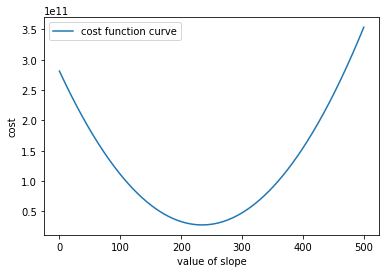

In [40]:
#plotting the cost values w.r.t every Beta value
plt.plot(Cost_table.slope, Cost_table.Cost, label='cost function curve')
plt.xlabel('value of slope')
plt.ylabel('cost')
plt.legend()

as slope increasing curve is decreasing means error is decreasing, moduel is better.

In [41]:
#finding minimum value of curve above.

new_slope=Cost_table['slope'][Cost_table['Cost']==Cost_table['Cost'].min()].values
new_slope[0]

234.3

In [42]:
#finding minimum value on curve

Cost_table['slope'].min()

0.0

In [43]:
Cost_table['Cost'].min()

27882012330.675

In [44]:
# define intercept error by cost function curve

def intercept_error(slope,intercept,sample_data):
    sale = []

    for i in range (len(sample_data.flat_area)):
        temp=sample_data.flat_area[i]*slope+intercept
        sale.append(temp)
    MSE=  mean_squared_error(sample_data.sale_price, sale)
    return MSE

In [45]:
intercept = [i for i in range (5000, 50000)]
Cost=[]
for i in intercept:
    cost = intercept_error(slope=234, intercept=i, sample_data=sample_data)
    Cost.append(cost)
    

In [46]:
#Arranging in new 'cost_table' dataframe

Cost_table=pd.DataFrame({'intercept':intercept, 'Cost':Cost})
Cost_table.tail()

,intercept,Cost
44995,49995,2.929862e+10
44996,49996,2.929870e+10
44997,49997,2.929878e+10
44998,49998,2.929886e+10
44999,49999,2.929894e+10


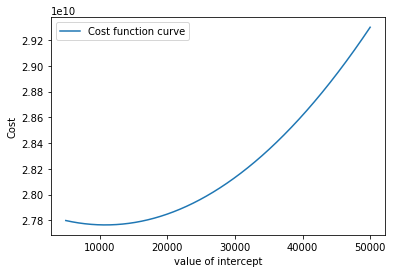

In [47]:
#plotting the cost values corresponding to every value of Beta.
plt.plot(Cost_table.intercept, Cost_table.Cost, label='Cost function curve')
plt.xlabel('value of intercept')
plt.ylabel('Cost')
plt.legend()

optimum value of intercept is more than 10000 here.

In [48]:
#putting optimum c value=10384 in slope_error function.

slope=[i/10 for i in range (0, 5000)]
Cost = []
for i in slope:
    cost=slope_error(slope=i, intercept=10384, sample_data=sample_data)
    Cost.append(cost)

In [49]:
Cost_table=pd.DataFrame({'slope':slope, 'Cost':Cost})
Cost_table.tail()

,slope,Cost
4995,499.5,3.632121e+11
4996,499.6,3.634611e+11
4997,499.7,3.637102e+11
4998,499.8,3.639593e+11
4999,499.9,3.642086e+11


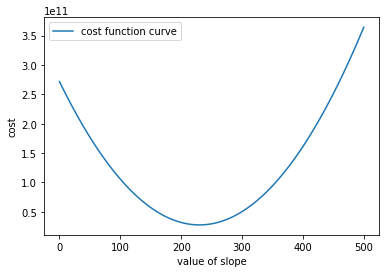

In [50]:
#plotting the cost values w.r.t every Beta value
plt.plot(Cost_table.slope, Cost_table.Cost, label='cost function curve')
plt.xlabel('value of slope')
plt.ylabel('cost')
plt.legend()

In [ ]:
#finding new minimum value of slope.

new_slope=Cost_table['slope'][Cost_table['Cost']==Cost_table['Cost'].min()].values
new_slope[0]

# #Gradient Descent

In [52]:
#Step1-Initialize parameters
#Randomly choose m=0.1 and C=mean of target variable

def param_init(Y):
    
    '''Y target variable
    returns initialized values of slope(m)& intercept(c)'''
    
    m=0.1
    c=Y.mean()
    return m,c
    
    

In [53]:
#Generate predictions
#return a list containing prediction of every value of x 

def generate_prediction(m, c, X):
    
    '''X input variable
    returns prediction generated by line with m &c'''
    
    prediction=[]
    for x in X:
        pred=m*x +c
        prediction.append(pred)
        
    return prediction

In [54]:
#calculate cost/error=mse between predicted and actual values.

def compute_cost(prediction, Y):
    
    '''returns the mean squared error between 
    prediction and Y'''
    
    cost = np.sum(((prediction-Y)**2)/len(Y))
    return cost

In [55]:
#updating parameters(m&c) in 2 parts
#1-calculate gradients
#2-using gradient to update parameters.

###Calculating Gradients (Gm & Gc).

def gradients(prediction, Y, X):
    
    '''returns gradient corresponding to m & c'''
    
    n=len(Y)
    Gm= 2/n* np.sum((prediction-Y)*X)
    Gc=2/n* np.sum((prediction-Y))
    return Gm, Gc
    


In [56]:
### Using gradient to update parameters.

def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    
    '''update and return the new values of m & c'''
    
    m_new = m_old - alpha* Gm_old
    c_new = c_old - alpha* Gc_old
    return m_new, c_new


In [57]:
#print & plot the result of gradient descent.
#define result function.

def result(m, c, X, Y, cost, prediction, i):
    
    ##if gradient descent converge to the optimum value before max_iteration
    
    if i<max_iter - 1:
        print('*****gradient descent has converged at iteration{}*****'.format(i))
        
    else:
        print('*****result after', max_iter, 'iteration is:*****')
        
        ##plotting the final result
        
    plt.figure(figsize(14,7), dpi=120)
    plt.scatter(X, Y, color='red', label='data points')
    label='final regression line: m={};c={}'.format(str(m), str(c))
    plt.plot(X, prediction, color='green', label=lable)
    plt.xlabel('falt area')
    plt.ylabel('sale price')
    plt.title('final regression line')
    plt.legend()

In [58]:
#define and reshaping dataset .

##first scale the dataset to avoid large values of parameters.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

sale_price=sample_data['sale_price'].values.reshape(-1,1)
flat_area=sample_data['flat_area'].values.reshape(-1,1)

#declare some parameters of gradient descent

max_iter=1000
cost_old=0
alpha=0.01

##Step1-initialize the values and pass target var sale_Price under it.

m, c= param_init(sale_price)

#loop for gradient descent action:generate,calculate cost and update.

for i in range(0, max_iter):
    
    predictions= generate_prediction(m, c, flat_area)
    
    cost_new=compute_cost(predictions, sale_price)
    
    ##checking if gradient descent converged?
    
    if abs(cost_new - cost_old)< 10 ** (-7):
        break
        
        Gm, Gc =gradients(predictions, sale_price, flat_area)
        
        m, c = param_update( m, c,  Gm, Gc, alpha)
        
        ##displaying result after every 20th iteration.
        
        if i%20==0:
            print('After iteration', i,': m=', m, '; c =',c,'; Cost=', cost_new )
                  
        ##updating cost_old.
                  
        cost_new = cost_old
        
    result(m, c, flat_area, sale_price, cost_new, predictions, i)

*****gradient descent has converged at iteration0*****


NameError: name 'figsize' is not defined